In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"E:\oasis database\Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

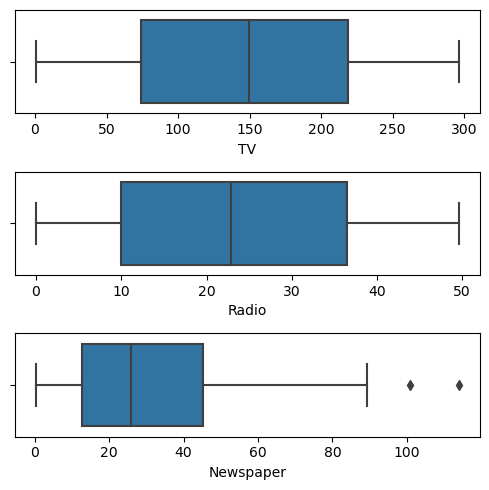

In [7]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Radio'], ax = axs[1])
plt3 = sns.boxplot(data['Newspaper'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

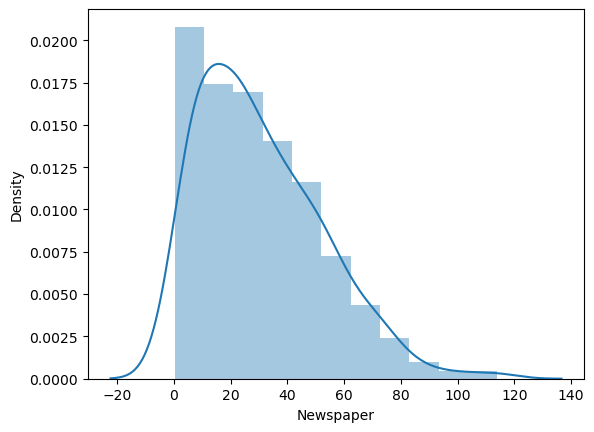

In [8]:
sns.distplot(data['Newspaper'])

In [9]:
irq = data.Newspaper.quantile(0.75) - data.Newspaper.quantile(0.25)

In [10]:
lower_bridge = data["Newspaper"].quantile(0.25) - (irq*1.5)
upper_bridge = data["Newspaper"].quantile(0.75) + (irq*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [11]:
df = data.copy()

In [12]:
df.loc[df['Newspaper']>=93, 'Newspaper'] = 93

<AxesSubplot:xlabel='Newspaper'>

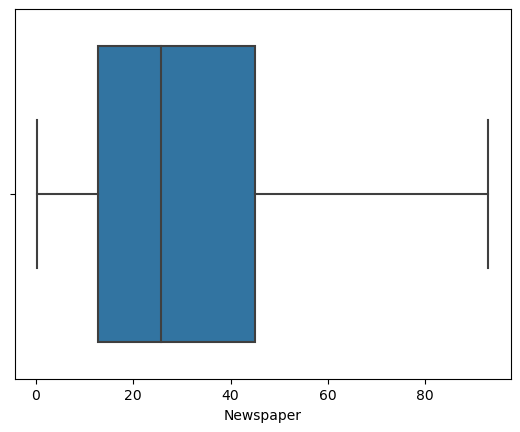

In [13]:
sns.boxplot(df['Newspaper'])

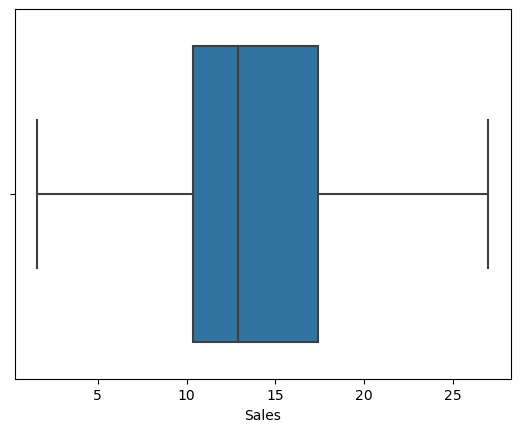

In [14]:
sns.boxplot(df['Sales']);

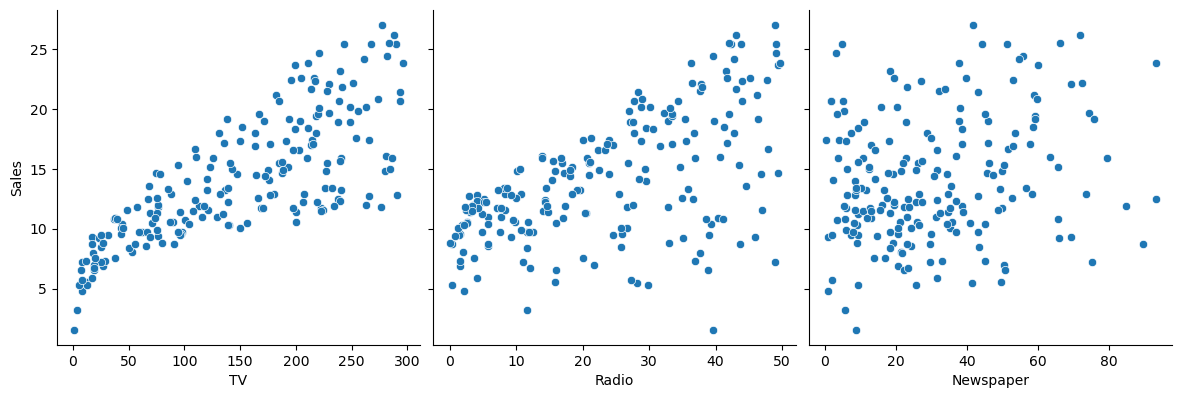

In [15]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'],
            y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

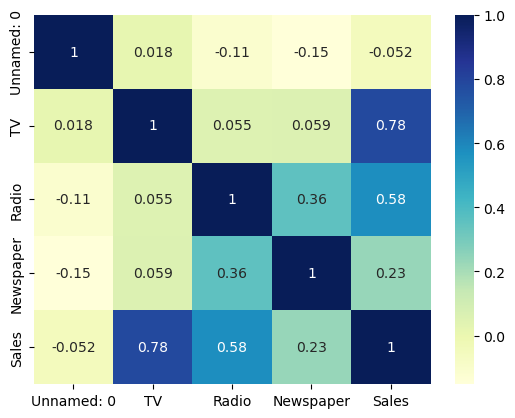

In [16]:
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [17]:
important_feature=list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [18]:
print(important_feature)

['TV', 'Radio', 'Sales']


In [19]:
x=data['TV']
y=data['Sales']

In [50]:
X=x.values.reshape(-1,1)
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [43]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [51]:
print(X.shape,y.shape)

(200, 1) (200,)


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [54]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [55]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [56]:
knm = KNeighborsRegressor().fit(x_train,y_train)
knm

KNeighborsRegressor()

In [57]:
knm_train_pred = knm.predict(x_train)

In [58]:
knm_test_pred = knm.predict(x_test)

In [59]:
print(knm_train_pred,knm_test_pred)

[14.34 16.5  11.42 18.14 12.48 20.8   7.18 15.06  9.94 10.12  9.16 16.64
 19.32 10.58 14.5  17.94 21.36 18.9   9.36 11.82 14.92 14.34 12.5  11.42
 18.06 12.5  14.56  9.96 20.8  17.06 21.44 18.06 11.52  9.26 14.02 18.68
 18.82 14.52 13.42 10.6  12.5  18.9   7.72 16.5  16.   11.   12.3   5.96
 12.48 14.5  10.6  18.9  16.5  13.56 17.36 11.42  7.82 17.32  7.82 17.82
 19.58 15.28 19.36 14.36 10.04  9.94 18.06  6.04  7.72 18.82 12.    7.38
 13.34 19.32 17.02 11.   13.34 10.12 17.86  5.96 11.52 19.28 17.12 14.5
 11.   18.9   7.18 14.52  7.88 19.58 19.32 20.8   5.96 18.66 21.44 21.44
  9.94 19.36 17.16 19.68  7.82  9.94 12.5  17.36 16.74 13.56 14.72 18.82
 10.12  6.56 15.06  6.56  5.96 17.16  9.86 17.16 16.44  7.72  5.16 18.56
  7.82  7.18 15.24 18.84 18.9   5.96 18.68  7.18 16.08 19.58 18.14 15.06
  9.24 13.34] [11.52 18.06 10.12 13.68 20.64 15.06  5.16 12.06 18.06 17.12 18.56 15.04
  8.9  10.12 18.72  7.82 18.9   7.82 18.06 21.44 10.78 17.06 20.8   5.16
 13.34 18.82 15.24  8.9  11.82 13.42 1

In [83]:
Result=pd.DataFrame(columns=['Models','Train R2','Test R2','Test RMSE','Variance'])

In [84]:
r2 = r2_score(y_test,knm_test_pred)
r2_train = r2_score(y_train,knm_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knm_test_pred))
variance = r2_train -r2
Result = Result.append({'Model':'K-Nearest Neighbors','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)
print("R2:",r2)
print('RMSE:',rmse)

R2: 0.45271365141145703
RMSE: 3.3876531610237106


In [85]:
Result.head()

,Models,Train R2,Test R2,Test RMSE,Variance,Model
0,NaN,0.683551,0.452714,3.387653,0.230837,K-Nearest Neighbors
